In [72]:
import numpy as np #for manipulating arrays in numpy format for faster computation
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt # for plotting graphs in matplotlib format 
from sklearn.preprocessing import StandardScaler #for standardizing the data
from imblearn.over_sampling import RandomOverSampler #for overSampling the minority class

In [73]:
# Load the DataSet and Display the first 5 rows 
#df = pd.read_csv("magic04.data")
# df.head(5)

In [74]:
# Associate the columns with respective names 
col=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=col)
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [75]:
# Class column has two values g and h. We need to convert them to 0 and 1
df["class"].unique()

array(['g', 'h'], dtype=object)

In [76]:
# Convert the class column to 0 and 1
df["class"] =( df["class"] == 'g').astype(int)  

In [77]:
# Show the Updated DataSet 
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [78]:
print(df["class"].unique())  # Ensure both 0 and 1 exist

[1 0]


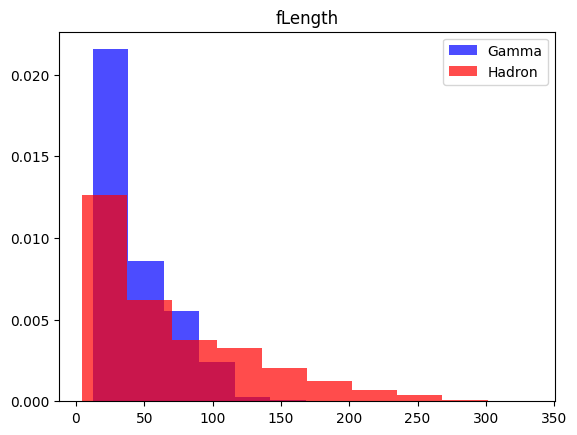

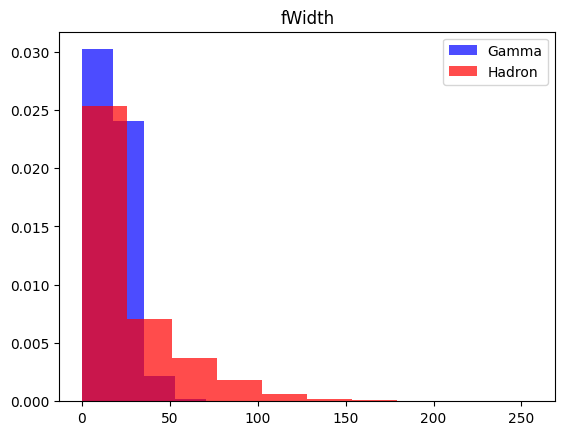

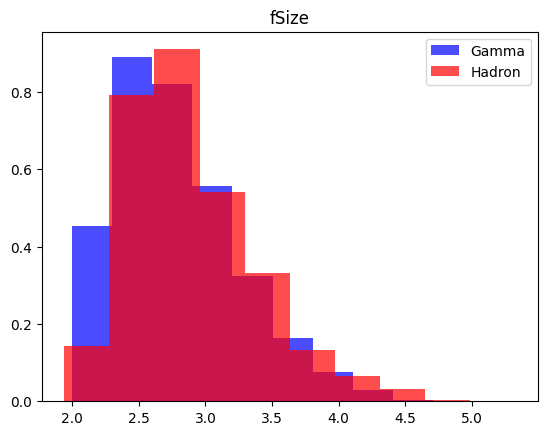

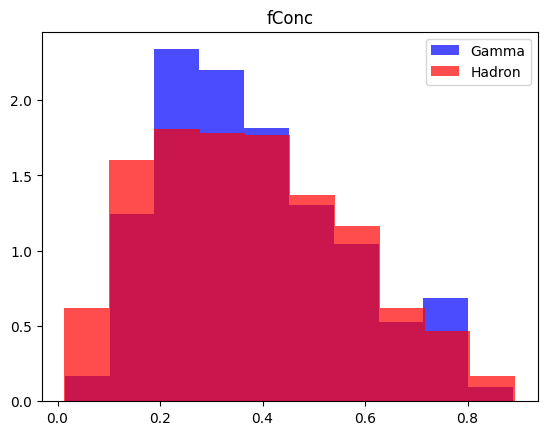

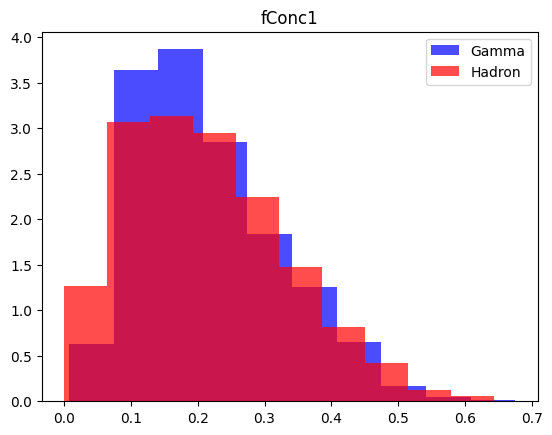

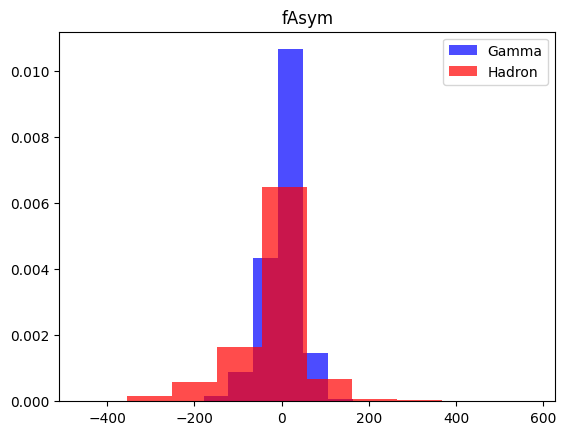

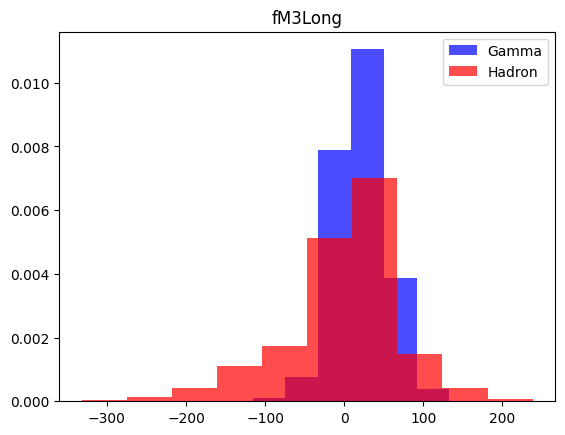

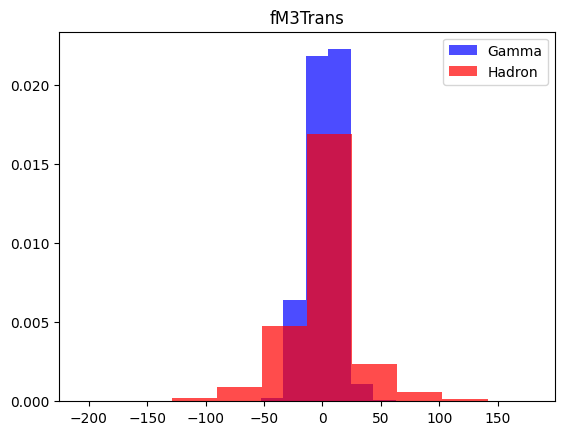

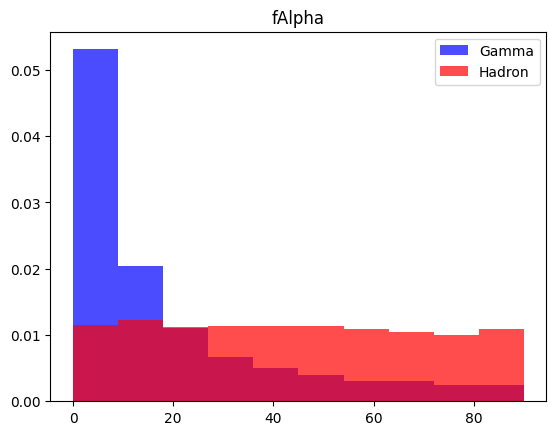

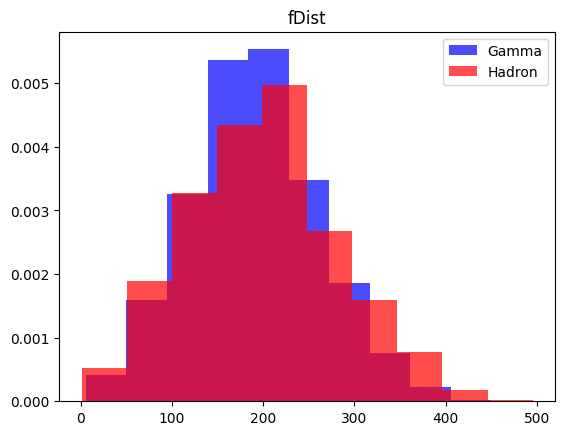

In [79]:
# Display the Probability Distribution for each feature
for label in col[:-1]: # All the columns except the last one
    plt.hist(df[df["class"]==1][label],color='blue',label='Gamma',alpha=0.7,density=True) #Alpha represents the transparency of the plot
    plt.hist(df[df["class"]==0][label],color='red',label='Hadron',alpha=0.7,density=True) #density=True normalizes the data meaning the area under the curve is 1
    plt.title(label)
    plt.legend()
    plt.show()

### Preparing Data 

In [80]:
### Train Validation and Test DataSets
Train, Valid, Test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))]) # 60% Train, 20% Validation and 20% Test
# frac=1 means the entire dataset is used => shuffles the rows of the dataframe df randomly.


C:\Users\Hadil sghair\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [81]:
# The values in the dataset are in different ranges. We need to normalize them to a common range => ⚠️ Scale the data
# This is a Function that scales the dataset
# The function takes in a dataframe and a boolean value OverSample which is False by default

def Scale_DataSet(dataframe, OverSample=False): 
    X=dataframe[dataframe.columns[:-1]].values # Extract the features's values from the dataframe
    Y=dataframe[dataframe.columns[-1]].values # Extract the target's values from the dataframe
    scaler=StandardScaler() # Create a StandardScaler object
    X=scaler.fit_transform(X) 
    if OverSample:
        ros=RandomOverSampler() # Create a RandomOverSampler object
        X,Y=ros.fit_resample(X,Y) # OverSample the minority class
    data=np.hstack((X,np.reshape(Y,(-1,1)))) # Stack the features and target values together . the reshape is to ensure the target values are in the right shape
    return data, X, Y
    

In [82]:
print("Number of Gamma in Train:",len(Train[Train["class"]==1])) # Number of Gamma in the Training Set
print("Number of Hadron in Train:",len(Train[Train["class"]==0])) # Number of Hadron in the Training Set


Number of Gamma in Train: 7389
Number of Hadron in Train: 4023


In [83]:
# Scale / OverSample the Training Set
Train, Train_X,Train_Y=Scale_DataSet(Train,OverSample=True)
Valid, Valid_X,Valid_Y=Scale_DataSet(Valid,OverSample=False) # we don't need to OverSample the Validation and Test Sets
Test, Test_X,Test_Y=Scale_DataSet(Test,OverSample=False)

In [84]:
# Validate the Scaling and OverSampling
#⚠️ we used the len method because the data is in numpy format no longer a dataframe
print("Number of Gamma in Train:", len(Train_Y[Train_Y == 1]))
print("Number of Hadron in Train:", len(Train_Y[Train_Y == 0]))

Number of Gamma in Train: 7389
Number of Hadron in Train: 7389


### K-Nearest Neighbors (KNN)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [86]:
knn_model=KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(Train_X,Train_Y)

KNeighborsClassifier(n_neighbors=3)

In [87]:
Y_pred=knn_model.predict(Test_X)

In [88]:
Y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [89]:
Test_Y

array([1, 1, 1, ..., 0, 1, 1])

In [90]:
print(classification_report(Test_Y,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1337
           1       0.86      0.85      0.86      2467

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB # Gaussian is the most common type of Naive Bayes Classifier

In [92]:
NB_model=GaussianNB()
NB_model=NB_model.fit(Train_X,Train_Y)

In [93]:
Y_pred=NB_model.predict(Test_X)
print(classification_report(Test_Y,Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.39      0.50      1337
           1       0.73      0.89      0.80      2467

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
LR_MOdel=LogisticRegression()
LR_MOdel=LR_MOdel.fit(Train_X,Train_Y)

In [96]:
Y_pred=LR_MOdel.predict(Test_X)
print(classification_report(Test_Y,Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1337
           1       0.85      0.82      0.83      2467

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support vector Machines SVM's

In [97]:
from sklearn.svm import SVC

In [98]:
SVC_model=SVC()
SVC_model=SVC_model.fit(Train_X,Train_Y)

In [99]:
y_pred1=SVC_model.predict(Test_X)
print(classification_report(Test_Y,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1337
           1       0.89      0.89      0.89      2467

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks 

In [100]:
import tensorflow as tf

In [101]:

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(history.history['accuracy'],label='accuracy')
    ax1.plot(history.history['val_accuracy'],label='val_accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    
    ax2.plot(history.history['val_loss'],label='val_loss')
    ax2.plot(history.history['loss'],label='loss')
    ax2.set_title('Model loss')
    ax2.set_ylabel('binary_crossentropy')
    ax2.set_xlabel('Epoch')
    
    plt.show()
    


In [ ]:

# //*? Training the Model the points is to find the best hyperparameters trough trial and error
def model_training(Train_X, Train_Y,learning_Rate, num_nodes, epochs,batch_size,dropout_prob):
  
    NN_Model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)), # 10 is the number of features
        tf.keras.layers.Dropout(dropout_prob), # //*! Dropout is a technique where randomly selected neurons are ignored during training to avoid Overfitting
        tf.keras.layers.Dense(num_nodes,activation='relu'), # num_nodes is the number of neurons in the hidden layer
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid') # we are projecting our prediction to be 0 or 1
    ])

    # //*! Keep in Mind the number of neurons in the last layer should be equal to the number of classes in the dataset hence sigmoid 0 or 1
    #  ⚠️ Adam is an adaptive learning rate optimization algorithm that's widely used in deep learning.
    # the Learning Rate is how much to update the model weights at each step
    # Binary crossentropy quantifies the gap between predicted probabilities and true binary labels, guiding the model to adjust its weights for improved classification accuracy.   
    NN_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_Rate),loss='binary_crossentropy'
                    ,metrics=['accuracy'])  
    history = NN_Model.fit(
    Train_X,Train_Y,
    epochs=epochs, batch_size=batch_size,validation_split=0.2, verbose=0)
    return  NN_Model, history

 

C:\Users\Hadil sghair\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


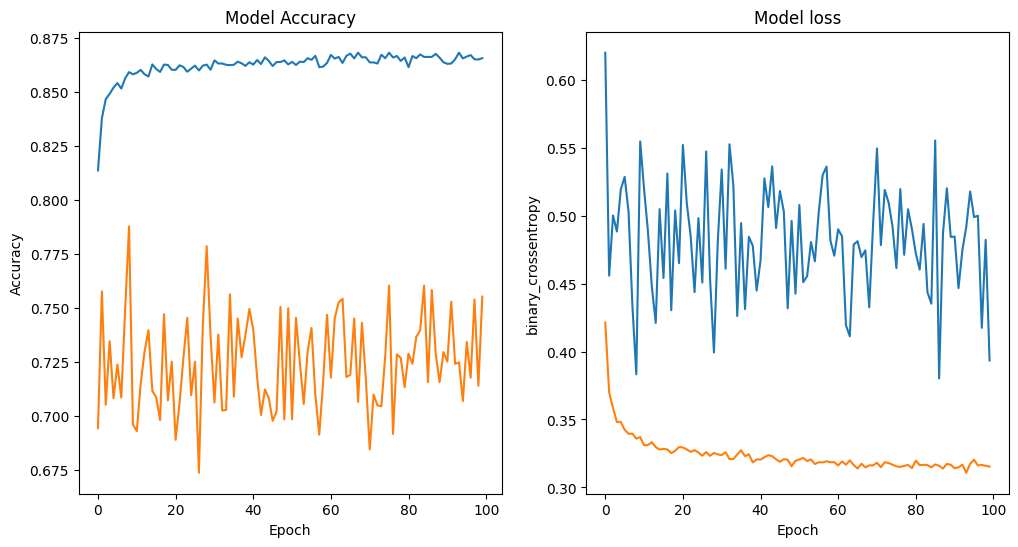

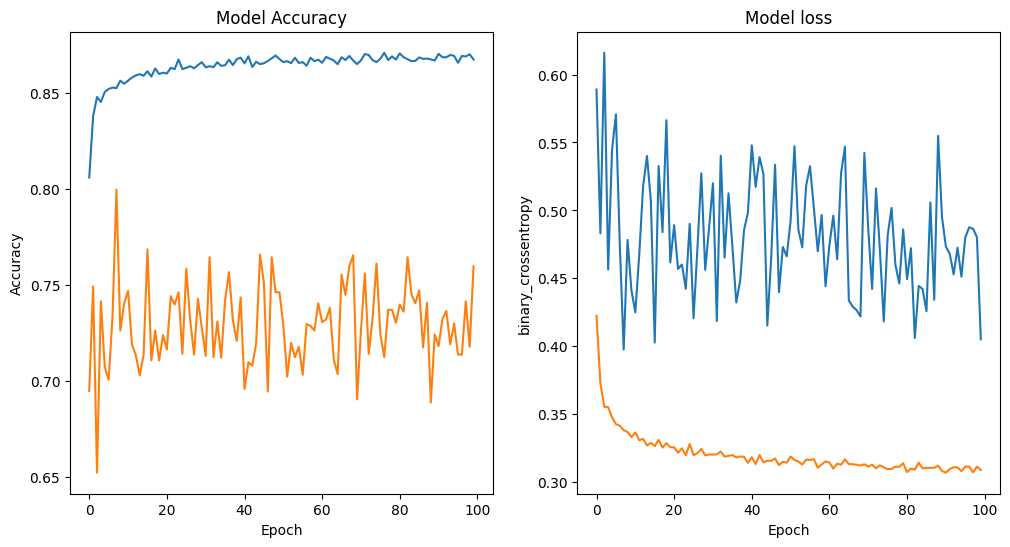

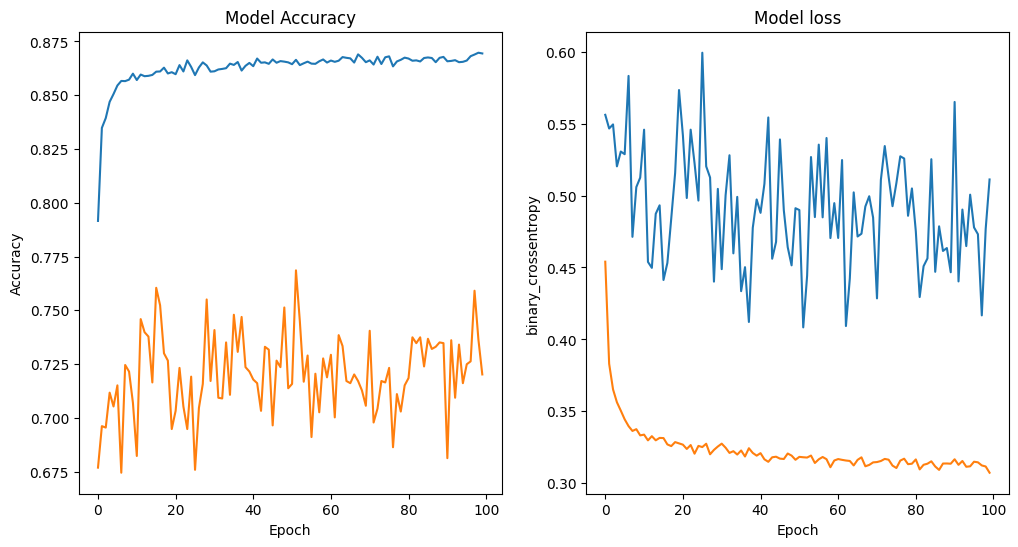

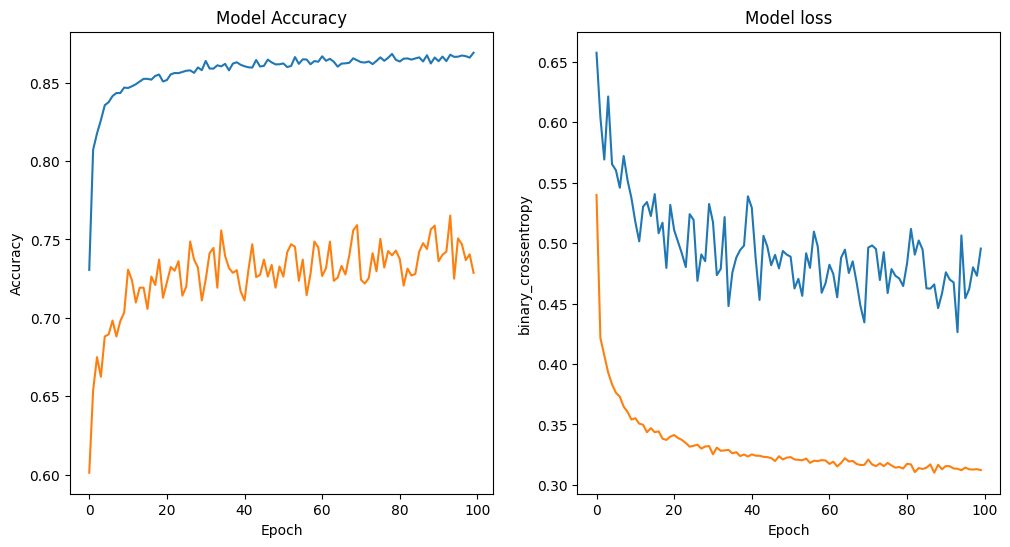

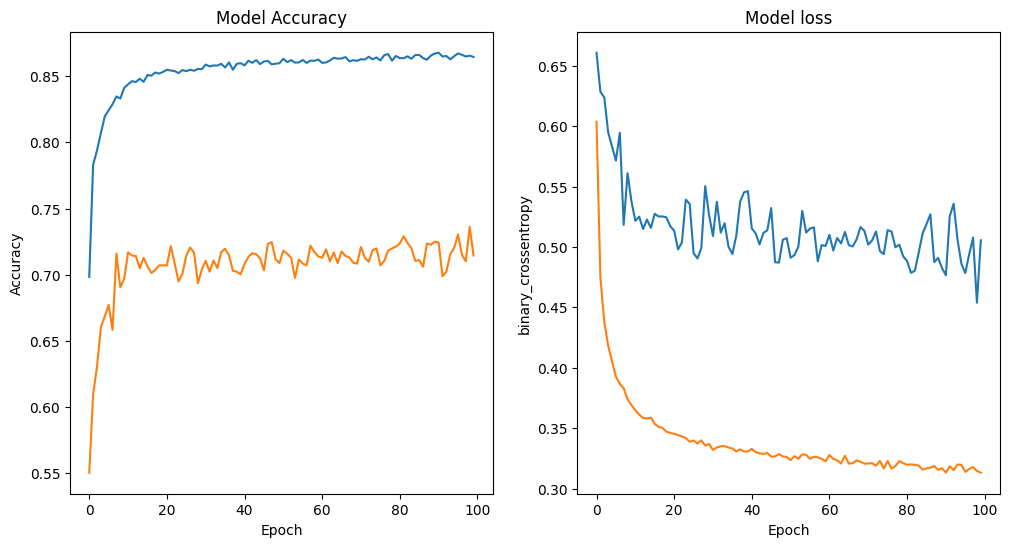

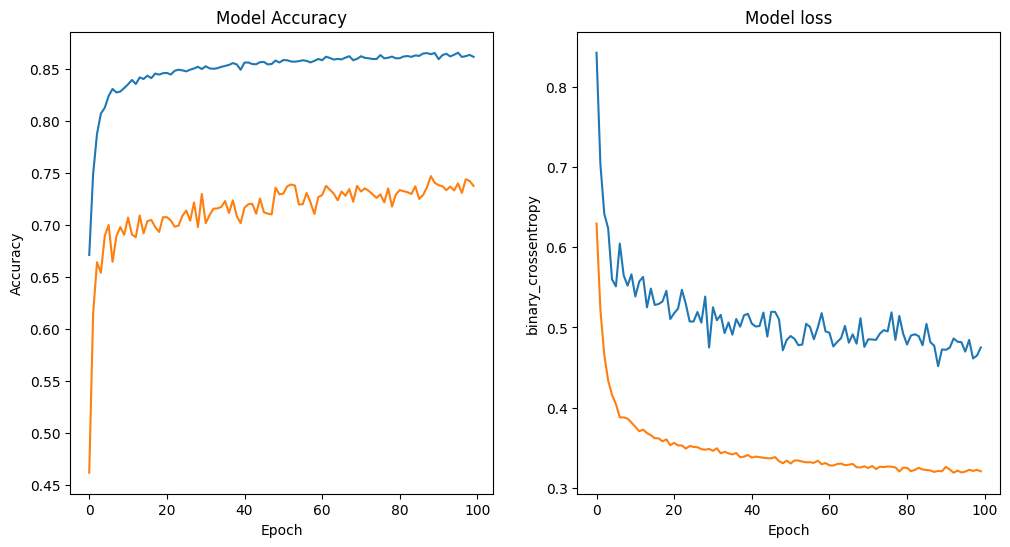

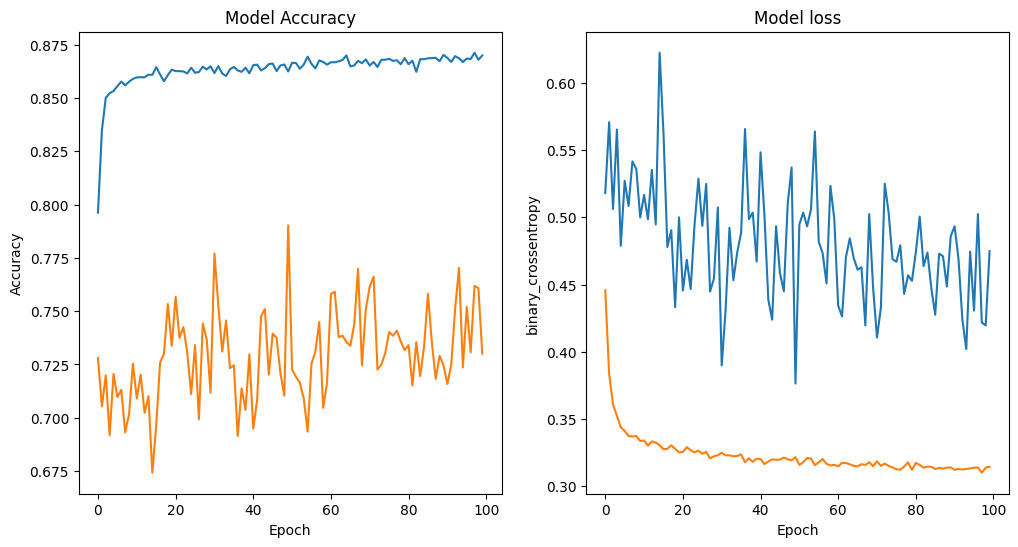

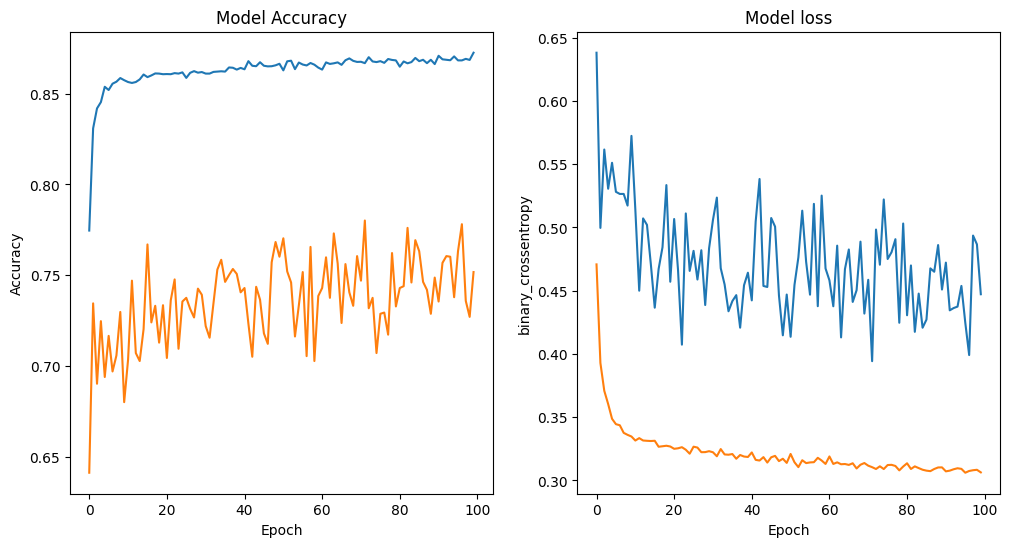

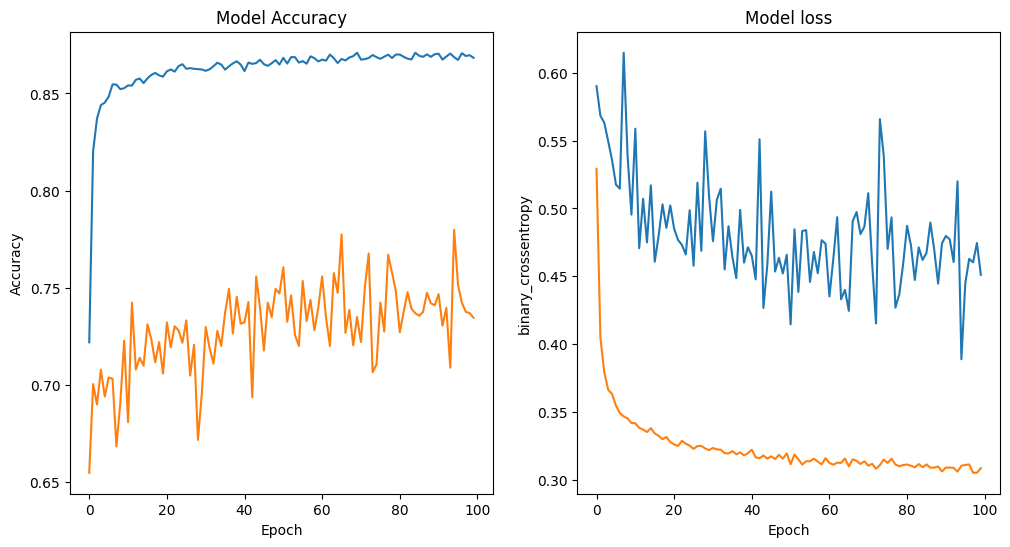

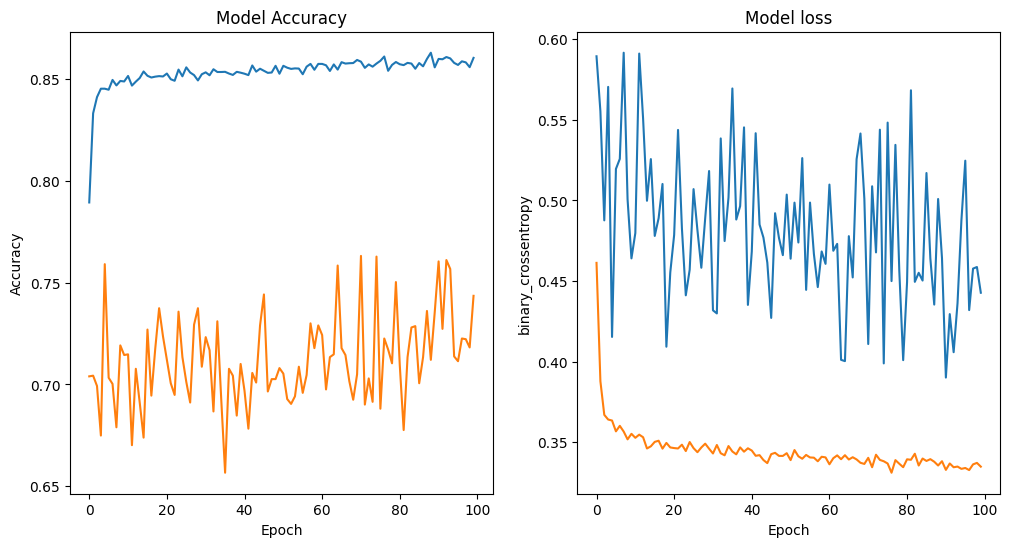

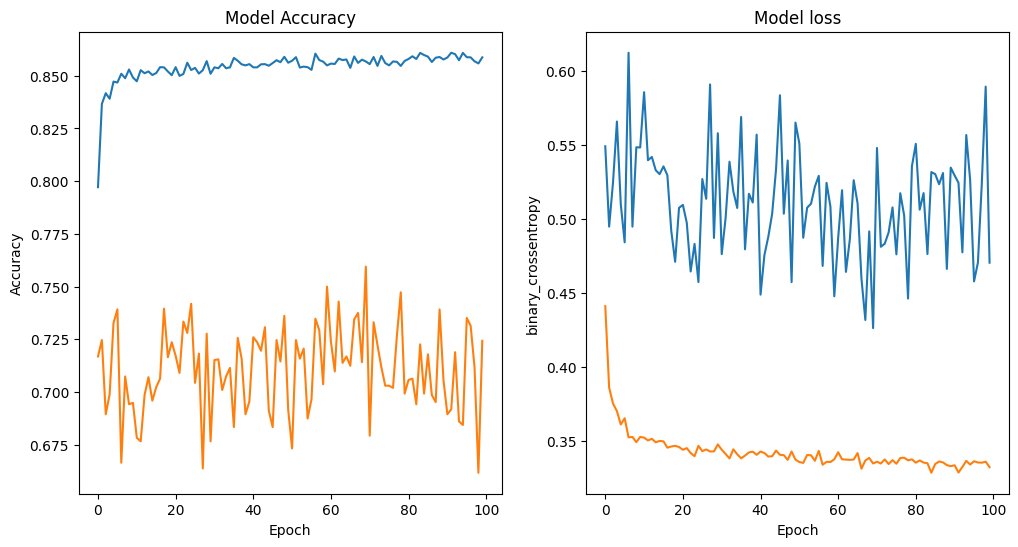

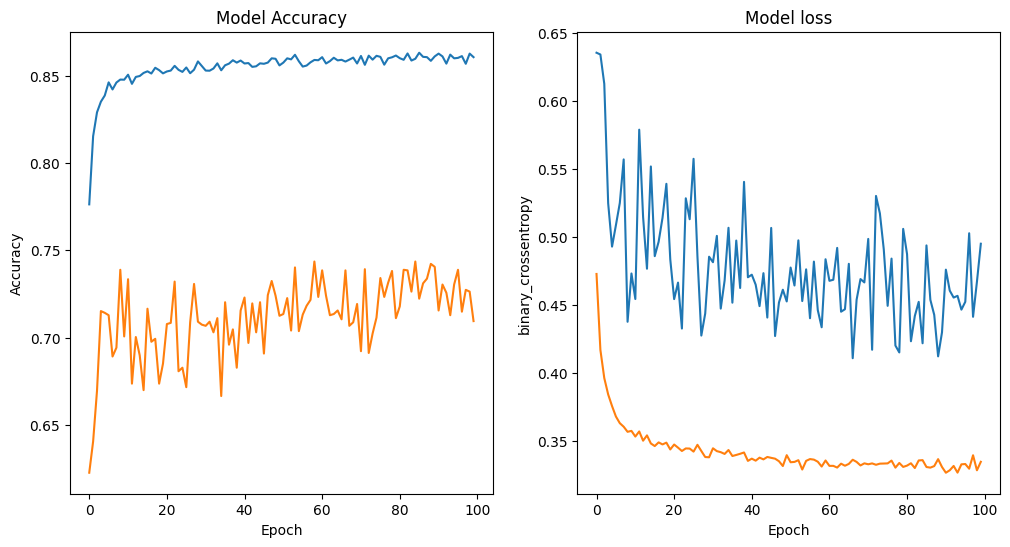

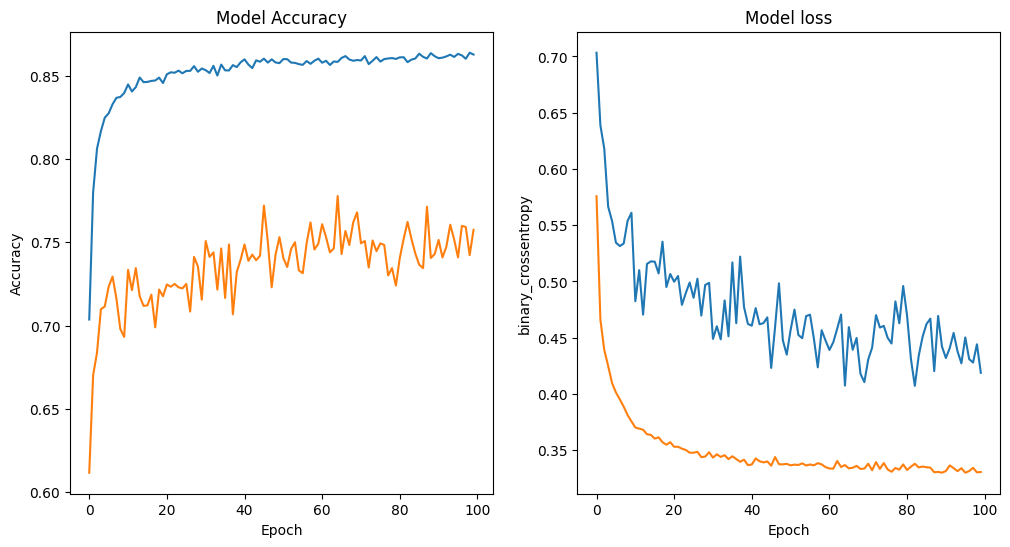

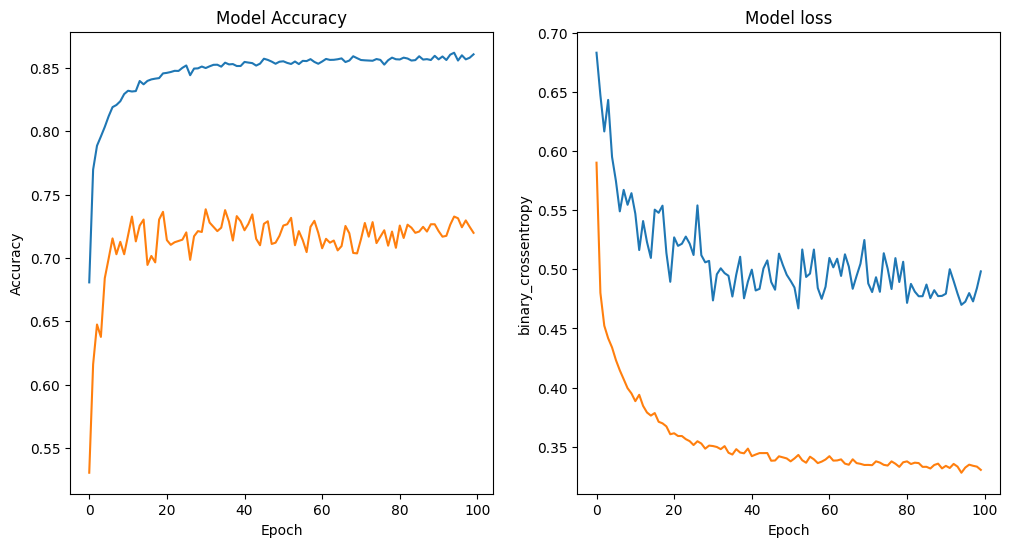

In [ ]:
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0.1,0.2]:
        for learning_Rate in [0.01,0.001,0.005]:
         for batch_size in [32,64,128]: # //*? Batch size is the number of samples processed before the model is updated
             model, history = model_training(Train_X, Train_Y,learning_Rate, num_nodes, epochs,batch_size,dropout_prob)
             plot_history(history)
            